In [1]:
import os
import datetime
def printbar():
    nowtime=datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    print("\n"+"========="*8+"%s"%nowtime)
    
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader, TensorDataset

dftrain_raw=pd.read_csv('./data/titanic/train.csv')
dftest_raw=pd.read_csv('./data/titanic/test.csv')
dftrain_raw.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,493,0,1,"Molson, Mr. Harry Markland",male,55.0,0,0,113787,30.5000,C30,S
1,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
2,388,1,2,"Buss, Miss. Kate",female,36.0,0,0,27849,13.0000,NaN,S
3,192,0,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0000,NaN,S
4,687,0,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,NaN,S
5,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
6,228,0,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S
7,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
8,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9000,NaN,S
9,752,1,3,"Moor, Master. Meier",male,6.0,0,1,392096,12.4750,E121,S


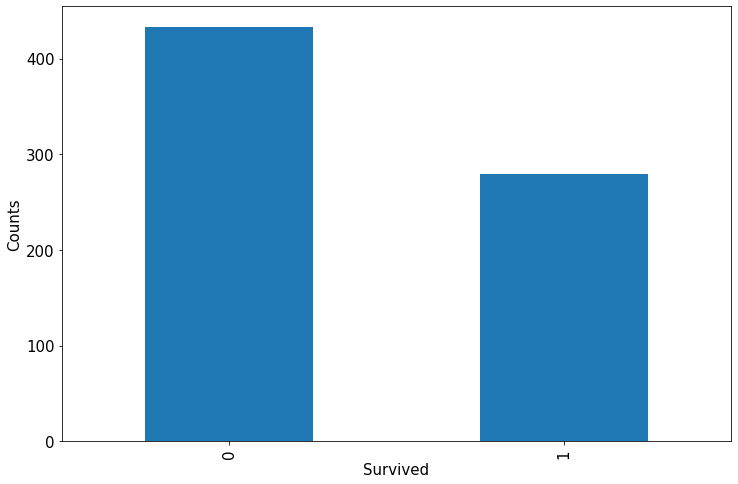

In [3]:
%matplotlib inline
%config InlineBackend.figure_format='png'
ax=dftrain_raw['Survived'].value_counts().plot(kind='bar', figsize=(12,8),fontsize=15)
ax.set_ylabel('Counts',fontsize=15)
ax.set_xlabel('Survived',fontsize=15)
plt.show()

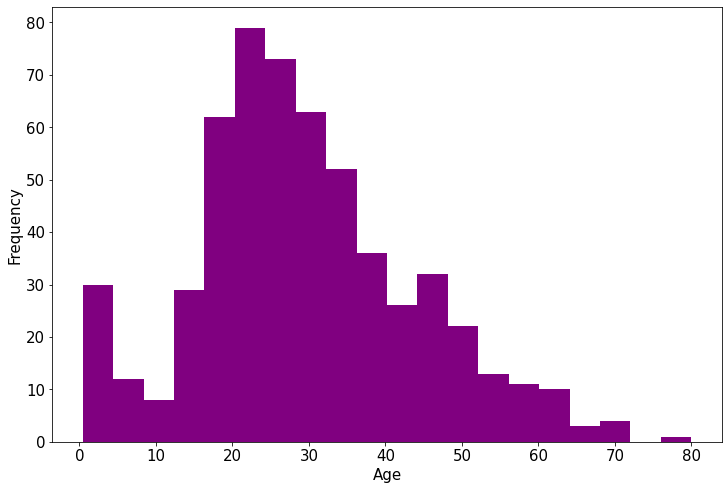

In [5]:
%matplotlib inline
%config INlineBackend.figure_format='png'
ax=dftrain_raw['Age'].plot(kind='hist',bins=20,color='purple',figsize=(12,8),fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ax.set_xlabel('Age',fontsize=15)
plt.show()

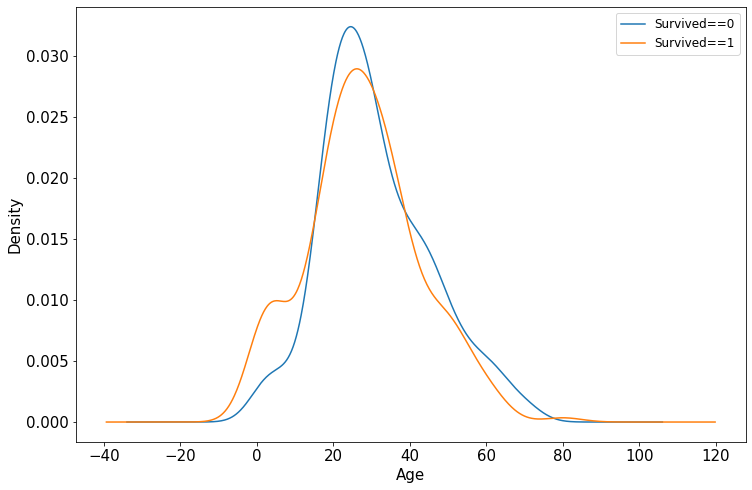

In [6]:
%matplotlib inline
%config InlineBackend.figure_format='png'
ax=dftrain_raw.query('Survived==0')['Age'].plot(kind='density',figsize=(12,8),fontsize=15)
dftrain_raw.query('Survived==1')['Age'].plot(kind='density',figsize=(12,8),fontsize=15)
ax.legend(['Survived==0','Survived==1'],fontsize=12)
ax.set_ylabel('Density',fontsize=15)
ax.set_xlabel('Age',fontsize=15)
plt.show()

In [8]:
def preprocessing(dfdata):
    dfresult=pd.DataFrame()
    
    #Pclass
    dfPclass=pd.get_dummies(dfdata['Pclass'])
    dfPclass.columns=['Pclass_'+str(x) for x in dfPclass.columns]
    dfresult=pd.concat([dfresult,dfPclass],axis=1)
    
    #Set
    dfSex=pd.get_dummies(dfdata['Sex'])
    dfresult=pd.concat([dfresult,dfSex],axis=1)
    
    #Age
    dfresult['Age']=dfdata['Age'].fillna(0)
    dfresult['Age_null']=pd.isna(dfdata['Age']).astype('int32')
    
    #SibSp,Parch,Fare
    dfresult['SibSp']=dfdata['SibSp']
    dfresult['Parch']=dfdata['Parch']
    dfresult['Fare']=dfdata['Fare']
    
    #Carbin
    dfresult['Cabin_null']=pd.isna(dfdata['Cabin']).astype('int32')
    
    #Embarked
    dfEmbarked=pd.get_dummies(dfdata['Embarked'],dummy_na=True)
    dfEmbarked.columns=['Embarked_'+str(x) for x in dfEmbarked.columns]
    dfresult=pd.concat([dfresult,dfEmbarked],axis=1)
    
    return(dfresult)

x_train=preprocessing(dftrain_raw).values
y_train=dftrain_raw[['Survived']].values

x_test=preprocessing(dftest_raw).values
y_test=dftest_raw[['Survived']].values

print("x_train.shape=",x_train.shape)
print("x_test.shape=",x_test.shape)

print("y_train.shape=",y_train.shape)
print("y_test.shape=",y_test.shape)

x_train.shape= (712, 15)
x_test.shape= (179, 15)
y_train.shape= (712, 1)
y_test.shape= (179, 1)


In [9]:
dl_train=DataLoader(TensorDataset(torch.tensor(x_train).float(),torch.tensor(y_train).float()),shuffle=True,batch_size=8)
dl_valid=DataLoader(TensorDataset(torch.tensor(x_train).float(),torch.tensor(y_train).float()),shuffle=True,batch_size=8)

In [11]:
for features,labels in dl_train:
    print(features,labels)
    break

tensor([[ 0.0000,  0.0000,  1.0000,  0.0000,  1.0000, 36.0000,  0.0000,  0.0000,
          0.0000,  7.4958,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000],
        [ 0.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  1.0000,  0.0000,
          0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000],
        [ 1.0000,  0.0000,  0.0000,  0.0000,  1.0000, 49.0000,  0.0000,  1.0000,
          0.0000, 56.9292,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  1.0000,  0.0000,  1.0000, 40.5000,  0.0000,  0.0000,
          0.0000,  7.7500,  1.0000,  0.0000,  1.0000,  0.0000,  0.0000],
        [ 1.0000,  0.0000,  0.0000,  0.0000,  1.0000, 27.0000,  0.0000,  0.0000,
          0.0000, 30.5000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000],
        [ 0.0000,  1.0000,  0.0000,  1.0000,  0.0000, 32.5000,  0.0000,  0.0000,
          0.0000, 13.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000],
        [ 0.0000,  0.0000,  1.0000,  1.0000,  0.0000, 18.0000,  0.0000,  0.0

In [13]:
def create_net():
    net=nn.Sequential()
    net.add_module("linear1",nn.Linear(15,20))
    net.add_module("relu1",nn.ReLU())
    net.add_module("linear2",nn.Linear(20,15))
    net.add_module("relu2",nn.ReLU())
    net.add_module("linear3",nn.Linear(15,1))
    net.add_module("sigmod",nn.Sigmoid())
    return net

net=create_net()
print(net)

Sequential(
  (linear1): Linear(in_features=15, out_features=20, bias=True)
  (relu1): ReLU()
  (linear2): Linear(in_features=20, out_features=15, bias=True)
  (relu2): ReLU()
  (linear3): Linear(in_features=15, out_features=1, bias=True)
  (sigmod): Sigmoid()
)


In [17]:
from torchkeras import summary
summary(net,input_shape=(15,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 20]             320
              ReLU-2                   [-1, 20]               0
            Linear-3                   [-1, 15]             315
              ReLU-4                   [-1, 15]               0
            Linear-5                    [-1, 1]              16
           Sigmoid-6                    [-1, 1]               0
Total params: 651
Trainable params: 651
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.000057
Forward/backward pass size (MB): 0.000549
Params size (MB): 0.002483
Estimated Total Size (MB): 0.003090
----------------------------------------------------------------


In [18]:
from sklearn.metrics import accuracy_score

loss_func=nn.BCELoss()
optimizer=torch.optim.Adam(params=net.parameters(),lr=0.01)
metric_func=lambda y_pred,y_true: accuracy_score(y_true.data.numpy(),y_pred.data.numpy()>0.5)
metric_name="accuracy"

In [23]:
epochs=10
log_step_freq=30

dfhistory=pd.DataFrame(columns=["epoch","loss",metric_name,"val_loss","val_"+metric_name])
print("Start Training...")
nowtime=datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
print("========="*8+"%s"%nowtime)

for epoch in range(1,epochs+1):
    net.train()
    loss_sum=0.0
    metric_sum=0.0
    step=1
    
    for step, (features,labels) in enumerate(dl_train,1):
        optimizer.zero_grad()
        
        predictions=net(features)
        loss=loss_func(predictions,labels)
        metric=metric_func(predictions,labels)
        
        loss.backward()
        optimizer.step()
        
        loss_sum+=loss.item()
        metric_sum+=metric.item()
        if step%log_step_freq==0:
            print(("[step=%d] loss: %.3f, "+metric_name+": %.3f")%(step,loss_sum/step,metric_sum/step))
            
    net.eval()
    val_loss_sum=0.0
    val_metric_sum=0.0
    val_step=1
    
    for val_step, (features,labels) in enumerate(dl_valid, 1):
        with torch.no_grad():
            predictions=net(features)
            val_loss=loss_func(predictions,labels)
            val_metric=metric_func(predictions,labels)
        val_loss_sum+=val_loss.item()
        val_metric_sum+=val_metric.item()
        
    info=(epoch,loss_sum/step,metric_sum/step,val_loss_sum/val_step,val_metric_sum/val_step)
    dfhistory.loc[epoch-1]=info
    
    print(("\nEPOCH = %d, loss= %.3f,"+metric_name+" =%.3f, val_loss=%.3f, "+"val_"+metric_name+" = %.3f")%info)
    nowtime=datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    print("\n"+"==========="*8+"%s"%nowtime)
    
print("Finished Training....")

Start Training...
========================================================================2020-08-26 15:12:20
[step=30] loss: 0.692, accuracy: 0.633
[step=60] loss: 0.647, accuracy: 0.673

EPOCH = 1, loss= 0.634,accuracy =0.664, val_loss=0.574, val_accuracy = 0.608

========================================================================================2020-08-26 15:12:20
[step=30] loss: 0.598, accuracy: 0.617
[step=60] loss: 0.575, accuracy: 0.688

EPOCH = 2, loss= 0.560,accuracy =0.708, val_loss=0.517, val_accuracy = 0.787

========================================================================================2020-08-26 15:12:21
[step=30] loss: 0.566, accuracy: 0.787
[step=60] loss: 0.544, accuracy: 0.777

EPOCH = 3, loss= 0.531,accuracy =0.778, val_loss=0.503, val_accuracy = 0.789

========================================================================================2020-08-26 15:12:21
[step=30] loss: 0.510, accuracy: 0.808
[step=60] loss: 0.505, accuracy: 0.806

EPOCH = 4, loss=

In [25]:
dfhistory

,epoch,loss,accuracy,val_loss,val_accuracy
0,1.0,0.633803,0.664326,0.574259,0.608146
1,2.0,0.560116,0.707865,0.516684,0.786517
2,3.0,0.530861,0.778090,0.502697,0.789326
3,4.0,0.511534,0.796348,0.483711,0.792135
4,5.0,0.493884,0.787921,0.478360,0.801966
5,6.0,0.493655,0.780899,0.473733,0.797753
6,7.0,0.489445,0.783708,0.541877,0.740169
7,8.0,0.507635,0.766854,0.524257,0.748596
8,9.0,0.482607,0.792135,0.457227,0.806180
9,10.0,0.466535,0.801966,0.454207,0.801966


In [29]:
%matplotlib inline
%config InlineBackend.figure_format='svg'

import matplotlib.pyplot as plt

def plot_metric(dfhistory,metric):
    train_metrics=dfhistory[metric]
    val_metrics=dfhistory['val_'+metric]
    epochs=range(1,len(train_metrics)+1)
    plt.plot(epochs,train_metrics,'bo--')
    plt.plot(epochs,val_metrics,'ro--')
    plt.title('Training and validation '+metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric,'val_'+metric])
    plt.show()

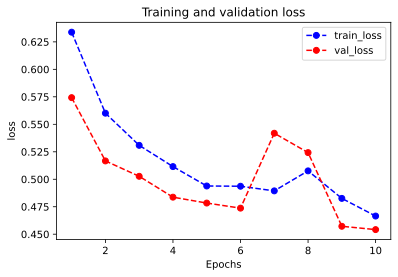

In [30]:
plot_metric(dfhistory,"loss")

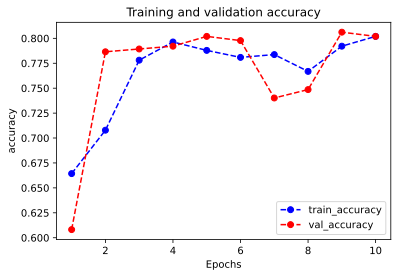

In [31]:
plot_metric(dfhistory,"accuracy")

In [32]:
y_pred_probs=net(torch.tensor(x_test[0:10]).float()).data
y_pred_probs

tensor([[0.0625],
        [0.6480],
        [0.4406],
        [0.8526],
        [0.6558],
        [0.7802],
        [0.0435],
        [0.8046],
        [0.7703],
        [0.0854]])

In [34]:
y_pred=torch.where(y_pred_probs>0.5,torch.ones_like(y_pred_probs),torch.zeros_like(y_pred_probs))
y_pred

tensor([[0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.]])

In [35]:
print(net.state_dict().keys())

odict_keys(['linear1.weight', 'linear1.bias', 'linear2.weight', 'linear2.bias', 'linear3.weight', 'linear3.bias'])


In [36]:
torch.save(net.state_dict(),"./data/net_parameter.pkl")

net_clone=create_net()
net_clone.load_state_dict(torch.load("./data/net_parameter.pkl"))

net_clone.forward(torch.tensor(x_test[0:10]).float()).data

tensor([[0.0625],
        [0.6480],
        [0.4406],
        [0.8526],
        [0.6558],
        [0.7802],
        [0.0435],
        [0.8046],
        [0.7703],
        [0.0854]])